### Importação dos dados



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from scipy.interpolate import interp1d
from folium.plugins import HeatMap




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja3.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


#1. Análise do faturamento


Faturamento da Loja 1: R$ 1,534,509.12, Faturamento da Loja 2: R$ 1,488,459.06, Faturamento da Loja 3: R$ 1,464,025.03, Faturamento da Loja 4: R$ 1,384,497.58


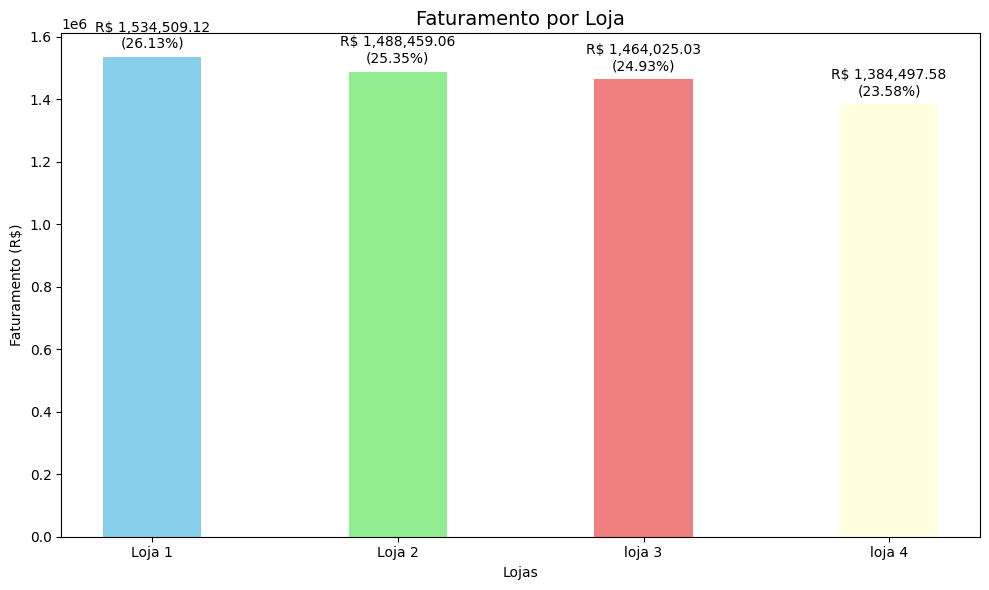

In [24]:
faturamentoloja1 = loja["Preço"].sum().item()
faturamentoloja2 = loja2["Preço"].sum().item()
faturamentoloja3 = loja3["Preço"].sum().item()
faturamentoloja4 = loja4["Preço"].sum().item()

print(f"Faturamento da Loja 1: R$ {faturamentoloja1:,.2f}, Faturamento da Loja 2: R$ {faturamentoloja2:,.2f}, Faturamento da Loja 3: R$ {faturamentoloja3:,.2f}, Faturamento da Loja 4: R$ {faturamentoloja4:,.2f}")

faturamento = [faturamentoloja1, faturamentoloja2, faturamentoloja3, faturamentoloja4]
lojas = ["Loja 1", "Loja 2", "loja 3", "loja 4"]

cores = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'salmon']

porcentagens = [(faturamentoloja / faturamentototal) * 100 for faturamentoloja in faturamento]

plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(lojas, faturamento, color=cores, width=bar_width)

plt.title("Faturamento por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")

for i, (valor, porcentagem) in enumerate(zip(faturamento, porcentagens)):
    plt.text(i, valor + (valor * 0.02), f"R$ {valor:,.2f}\n({porcentagem:.2f}%)", ha='center')

plt.tight_layout()
plt.show()


In [25]:
faturamentototal = faturamentoloja1 + faturamentoloja2 + faturamentoloja3 + faturamentoloja4
print(f"O faturamento total foi de: R$ {faturamentototal:,.2f}")


O faturamento total foi de: R$ 5,871,490.79


# 2. Vendas por Categoria


In [26]:
categoriaprodutos1 = loja["Categoria do Produto"].value_counts()
print(categoriaprodutos1)

categoriapopular1 = categoriaprodutos1.idxmax()
quantidadevendas1 = categoriaprodutos1.max()
print(f"A categoria mais popular da loja 1 é: {categoriapopular1} com {quantidadevendas1} vendas.")

categoriaprodutos2 = loja2["Categoria do Produto"].value_counts()
print(categoriaprodutos2)

categoriapopular2 = categoriaprodutos2.idxmax()
quantidadevendas2 = categoriaprodutos2.max()
print(f"A categoria mais popular da loja 2 é: {categoriapopular2} com {quantidadevendas2} vendas.")

categoriaprodutos3 = loja3["Categoria do Produto"].value_counts()
print(categoriaprodutos3)

categoriapopular3 = categoriaprodutos3.idxmax()
quantidadevendas3 = categoriaprodutos3.max()
print(f"A categoria mais popular da loja 3 é: {categoriapopular3} com {quantidadevendas3} vendas.")

categoriaprodutos4 = loja4["Categoria do Produto"].value_counts()
print(categoriaprodutos4)

categoriapopular4 = categoriaprodutos4.idxmax()
quantidadevendas4 = categoriaprodutos4.max()
print(f"A categoria mais popular da loja 4 é: {categoriapopular4} com {quantidadevendas4} vendas.")


Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
A categoria mais popular da loja 1 é: moveis com 465 vendas.
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
A categoria mais popular da loja 2 é: moveis com 442 vendas.
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
A categoria mais popular da loja 3 é: mov

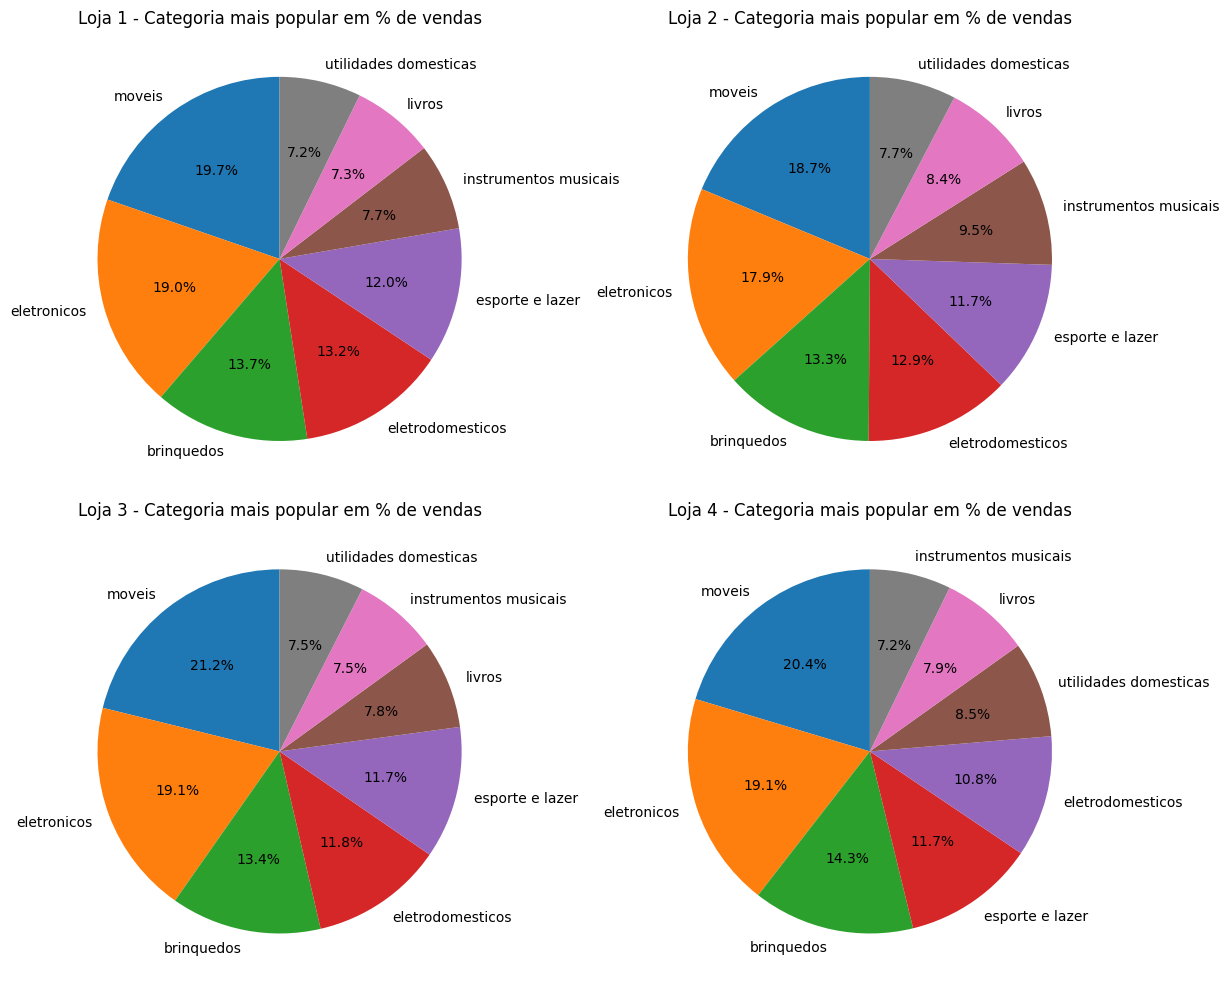

In [27]:
categoriaprodutos1 = loja["Categoria do Produto"].value_counts()
categoriaprodutos2 = loja2["Categoria do Produto"].value_counts()
categoriaprodutos3 = loja3["Categoria do Produto"].value_counts()
categoriaprodutos4 = loja4["Categoria do Produto"].value_counts()


fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].pie(categoriaprodutos1, labels=categoriaprodutos1.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title("Loja 1 - Categoria mais popular em % de vendas")


axs[0, 1].pie(categoriaprodutos2, labels=categoriaprodutos2.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title("Loja 2 - Categoria mais popular em % de vendas")


axs[1, 0].pie(categoriaprodutos3, labels=categoriaprodutos3.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title("Loja 3 - Categoria mais popular em % de vendas")


axs[1, 1].pie(categoriaprodutos4, labels=categoriaprodutos4.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title("Loja 4 - Categoria mais popular em % de vendas")


plt.tight_layout()
plt.show()



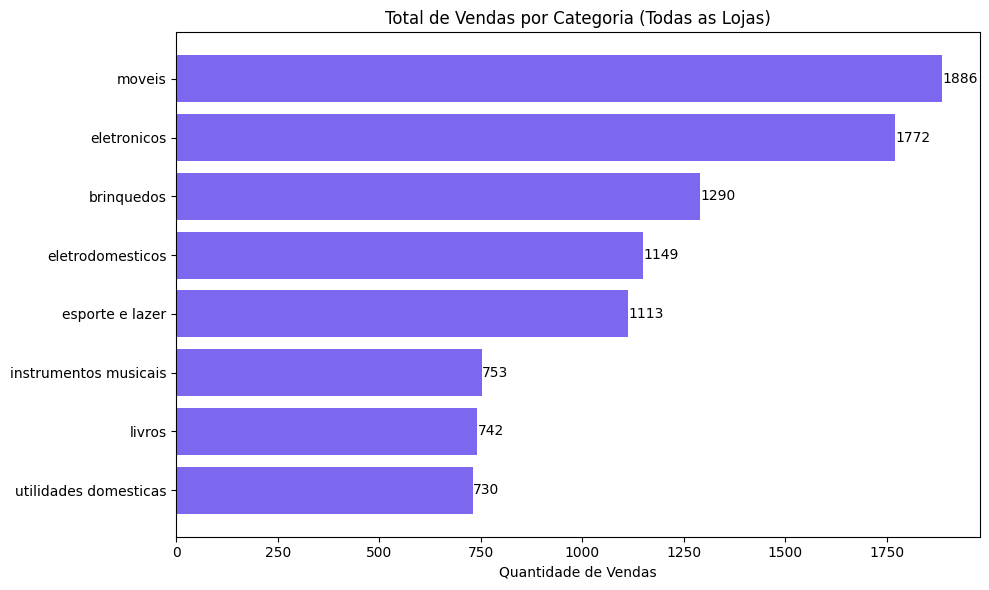

In [28]:
total_vendas = (
    loja["Categoria do Produto"].value_counts() +
    loja2["Categoria do Produto"].value_counts() +
    loja3["Categoria do Produto"].value_counts() +
    loja4["Categoria do Produto"].value_counts()
).fillna(0).sort_values(ascending=True)


plt.figure(figsize=(10, 6))
bars = plt.barh(total_vendas.index, total_vendas.values, color='mediumslateblue')
plt.title("Total de Vendas por Categoria (Todas as Lojas)")
plt.xlabel("Quantidade de Vendas")


for i, v in enumerate(total_vendas.values):
    plt.text(v + 1, i, str(int(v)), va='center')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [29]:
def medialojas(loja, numero):
    soma = loja["Avaliação da compra"].sum()
    quantidade = loja["Avaliação da compra"].count()
    media = soma / quantidade
    print(f"Loja {numero}: Média de avaliações: {media:.2f}")

medialojas(loja, 1)
medialojas(loja2, 2)
medialojas(loja3, 3)
medialojas(loja4, 4)


Loja 1: Média de avaliações: 3.98
Loja 2: Média de avaliações: 4.04
Loja 3: Média de avaliações: 4.05
Loja 4: Média de avaliações: 4.00


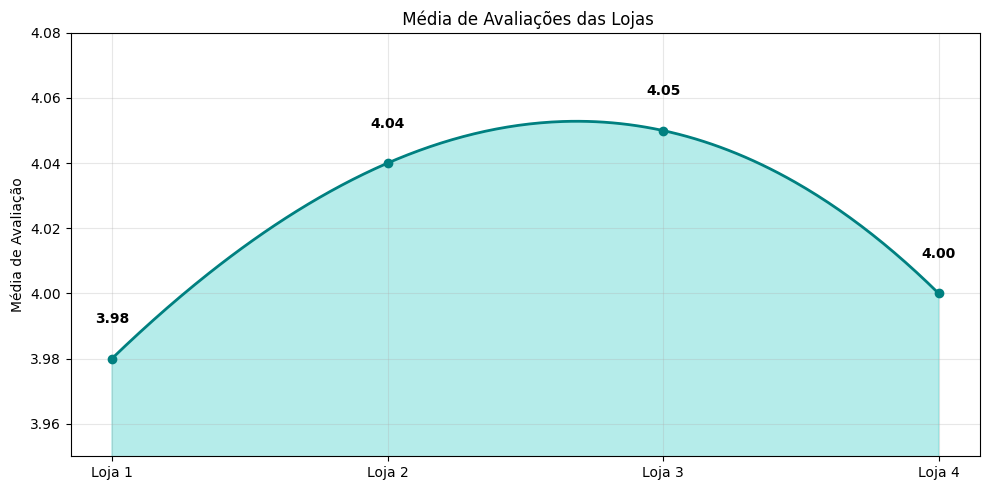

In [30]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [3.98, 4.04, 4.05, 4.00]


x = np.arange(len(medias))
y = np.array(medias)


x_novo = np.linspace(x.min(), x.max(), 300)
f_suave = interp1d(x, y, kind='cubic')
y_suave = f_suave(x_novo)

plt.figure(figsize=(10, 5))
plt.fill_between(x_novo, y_suave, color='mediumturquoise', alpha=0.4)
plt.plot(x_novo, y_suave, color='teal', linewidth=2)


plt.scatter(x, y, color='teal', zorder=5)


for i, valor in enumerate(y):
    plt.text(x[i], y[i] + 0.01, f"{valor:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(x, lojas)
plt.ylim(3.95, 4.08)
plt.title(" Média de Avaliações das Lojas")
plt.ylabel("Média de Avaliação")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [31]:
def analisevendas(lista_produtos, nome_loja):
    maximo_vendas = lista_produtos.max()
    minimo_vendas = lista_produtos.min()

    mais_vendidos = lista_produtos[lista_produtos == maximo_vendas]
    menos_vendidos = lista_produtos[lista_produtos == minimo_vendas]

    print(f" Vendas da {nome_loja}:")

    print(f" Produto(s) mais vendido(s) ({maximo_vendas} venda{'s' if maximo_vendas > 1 else ''}):")
    for produto in mais_vendidos.index:
        print(f"   - {produto}")

    print(f" Produto(s) menos vendido(s) ({minimo_vendas} venda{'s' if minimo_vendas > 1 else ''}):")
    for produto in menos_vendidos.index:
        print(f"   - {produto}")


produtos_loja = loja["Produto"].value_counts()
produtos_loja2 = loja2["Produto"].value_counts()
produtos_loja3 = loja3["Produto"].value_counts()
produtos_loja4 = loja4["Produto"].value_counts()

analisevendas(produtos_loja, "Loja 1")
analisevendas(produtos_loja2, "Loja 2")
analisevendas(produtos_loja3, "Loja 3")
analisevendas(produtos_loja4, "Loja 4")



















 Vendas da Loja 1:
 Produto(s) mais vendido(s) (60 vendas):
   - Micro-ondas
   - TV Led UHD 4K
   - Guarda roupas
 Produto(s) menos vendido(s) (33 vendas):
   - Headset
   - Celular ABXY
 Vendas da Loja 2:
 Produto(s) mais vendido(s) (65 vendas):
   - Iniciando em programação
 Produto(s) menos vendido(s) (32 vendas):
   - Jogo de tabuleiro
 Vendas da Loja 3:
 Produto(s) mais vendido(s) (57 vendas):
   - Kit banquetas
 Produto(s) menos vendido(s) (35 vendas):
   - Blocos de montar
 Vendas da Loja 4:
 Produto(s) mais vendido(s) (62 vendas):
   - Cama box
 Produto(s) menos vendido(s) (33 vendas):
   - Guitarra


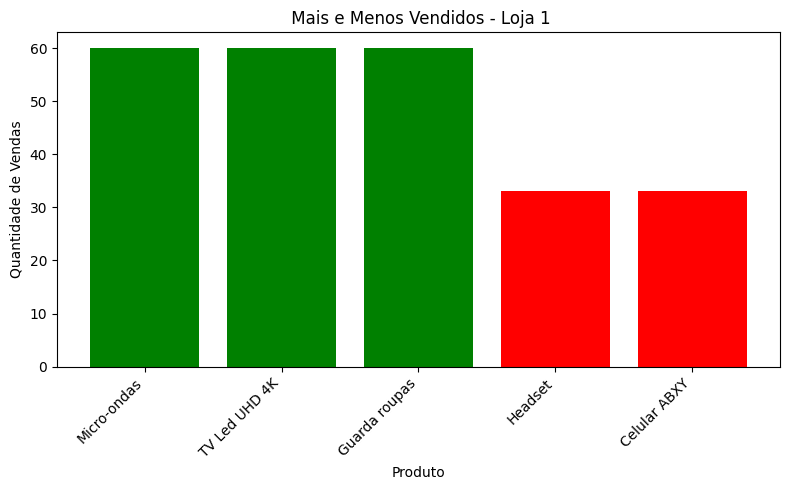

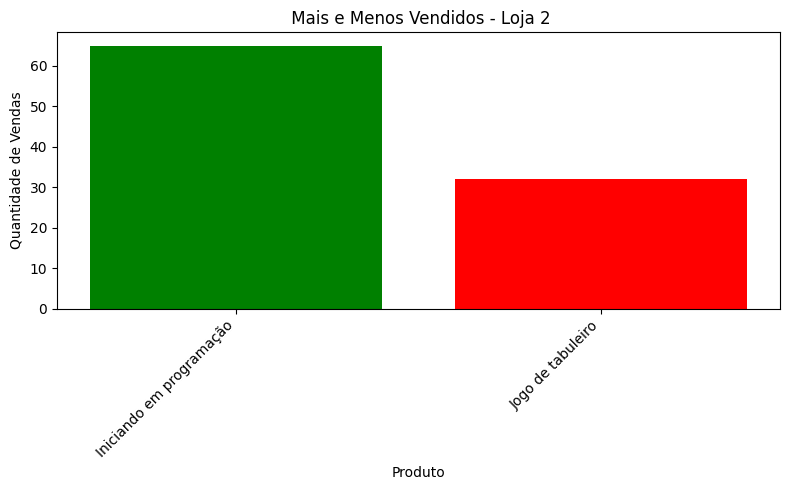

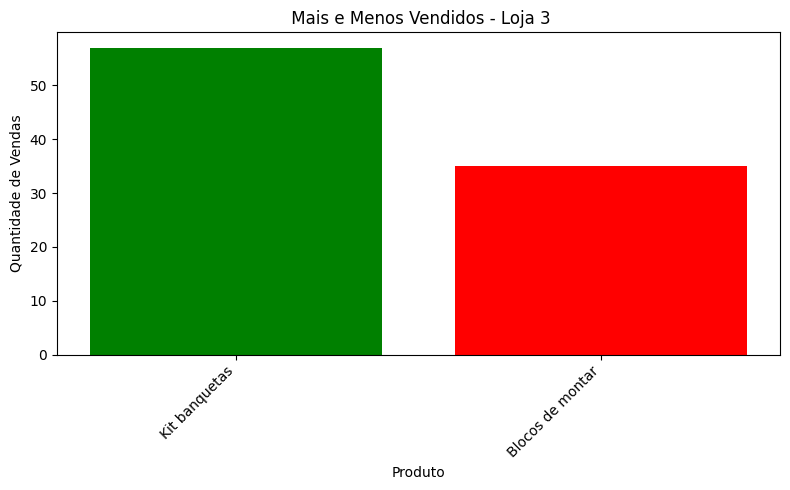

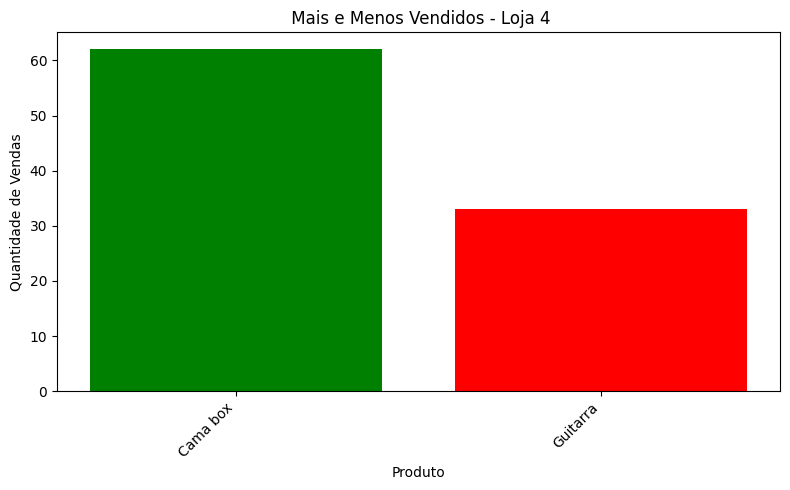

In [32]:
def analisevendas(lista_produtos, nome_loja):
    maximo_vendas = lista_produtos.max()
    minimo_vendas = lista_produtos.min()


    mais_vendidos = lista_produtos[lista_produtos == maximo_vendas]
    menos_vendidos = lista_produtos[lista_produtos == minimo_vendas]


    produtos = pd.concat([mais_vendidos, menos_vendidos])


    cores = ['green' if vendas == maximo_vendas else 'red' for vendas in produtos.values]


    plt.figure(figsize=(8, 5))
    plt.bar(produtos.index, produtos.values, color=cores)

    plt.title(f" Mais e Menos Vendidos - {nome_loja}")
    plt.xlabel("Produto")
    plt.ylabel("Quantidade de Vendas")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


produtos_loja = loja["Produto"].value_counts()
produtos_loja2 = loja2["Produto"].value_counts()
produtos_loja3 = loja3["Produto"].value_counts()
produtos_loja4 = loja4["Produto"].value_counts()


analisevendas(produtos_loja, "Loja 1")
analisevendas(produtos_loja2, "Loja 2")
analisevendas(produtos_loja3, "Loja 3")
analisevendas(produtos_loja4, "Loja 4")

# 5. Frete Médio por Loja


In [33]:
def medialojas_frete(loja, numero):
    soma = loja["Frete"].sum()
    quantidade = loja["Frete"].count()
    media = soma / quantidade
    print(f"Loja {numero}: Média de frete: R$ {media:.2f}")

medialojas_frete(loja, 1)
medialojas_frete(loja2, 2)
medialojas_frete(loja3, 3)
medialojas_frete(loja4, 4)


Loja 1: Média de frete: R$ 34.69
Loja 2: Média de frete: R$ 33.62
Loja 3: Média de frete: R$ 33.07
Loja 4: Média de frete: R$ 31.28


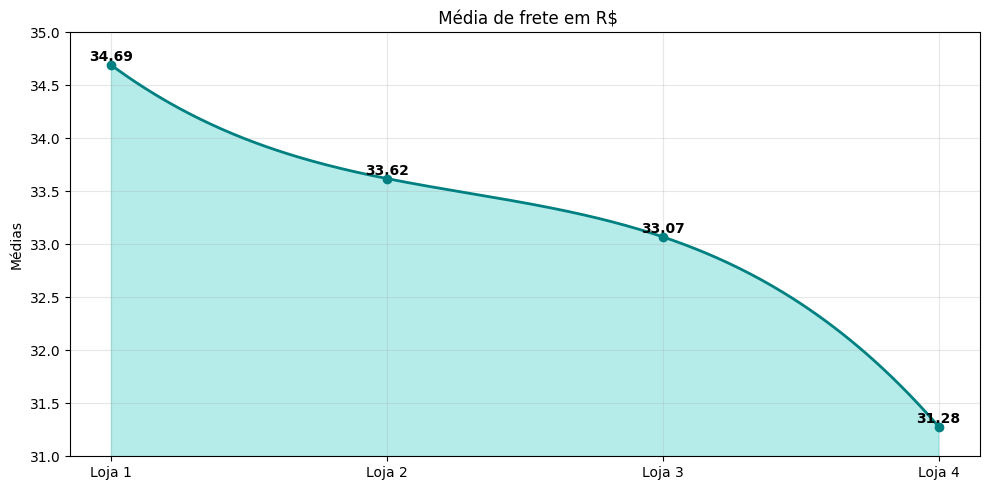

In [34]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [34.69, 33.62, 33.07, 31.28]


x = np.arange(len(medias))
y = np.array(medias)


x_novo = np.linspace(x.min(), x.max(), 300)
f_suave = interp1d(x, y, kind='cubic')
y_suave = f_suave(x_novo)

plt.figure(figsize=(10, 5))
plt.fill_between(x_novo, y_suave, color='mediumturquoise', alpha=0.4)
plt.plot(x_novo, y_suave, color='teal', linewidth=2)


plt.scatter(x, y, color='teal', zorder=5)


for i, valor in enumerate(y):
    plt.text(x[i], y[i] + 0.01, f"{valor:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(x, lojas)
plt.ylim(31.00, 35.00)
plt.title(" Média de frete em R$")
plt.ylabel("Médias")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 6. Análise de Desempenho Geográfico



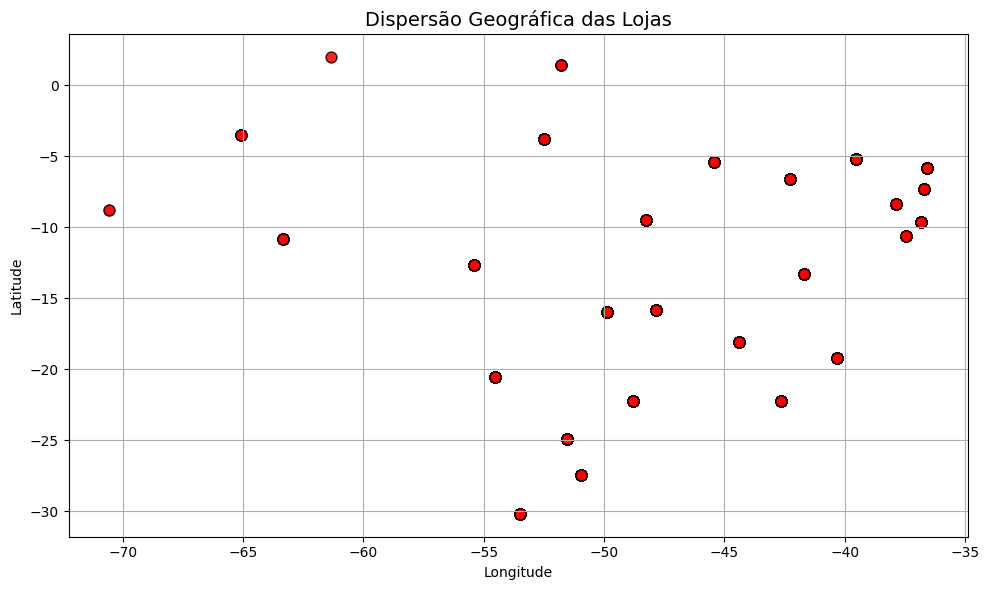

In [35]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


plt.figure(figsize=(10, 6))
plt.scatter(todas_lojas['lon'], todas_lojas['lat'], alpha=0.6, s=60, c='red', edgecolors='black')

plt.title('Dispersão Geográfica das Lojas', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Objetivo
O objetivo deste projeto foi analisar quatro lojas ficticias e de acordo com a análise dos dados recomendar ao Senhor João a venda de uma destas lojas. A análise foi feita de acordo com apuração das seguintes informações: análise do faturamento, vendas por categoria, média de avaliação das lojas, produtos mais e menos vendidos, e frete médio por loja. Após analisar criteriosamente cada uma das informações, foi possivel desenvolver gráficos que demonstram os dados de forma mais clara e objetiva, facilitando a compreensão das informações.

# Resultado da análise

A análise do faturamento indica que a **Loja 4** é a que menos fatura, com **23.58%** em relação ao faturamento total. Em comparação, a **Loja 1**, que é que mais fatura, obtém **26.13%** do faturamento. Isto indica que o menor faturamento é um dos fatores determinantes na decisão de venda da **loja 4.** Já as **lojas 2 e 3** indicam um faturamento mediano, demonstrando estabilidade em relação ao pouco retorno da **Loja 4.**

Nas quatro lojas houve uma categoria que foi predominantemente popular, a de **moveis**. A **Loja 3 e a Loja 4** foram as que mais se destacaram nesta categoria, com **499 e 480 vendas** respectivamente. Porém, vendo pelo lado financeiro e pelo preço das categorias, a que mais se destaca neste quesito é a categoria de eletrodomésticos, onde os produtos geralmente custam mais. Desta forma, é importante pontuar que esta categoria tem um destaque, sendo que uma porcentagem maior de vendas reflete diretamente num possivel maior faturamento, levando em consideração o conjunto de todas as vendas. Destaca-se negativamente a **Loja 4** neste quesito, onde apenas 10.8% das vendas da loja foram de eletrodomésticos, um valor muito abaixo da **loja 1**, que obteve **13.2% das vendas.**

Apesar de **loja 4** ter melhor avaliação em relação a **loja 1**, a diferença das médias são pequenas, portanto não justificaria uma tomada de decisão drástica em relação a **loja 1**, pois seu faturamento é o maior entre as quatro lojas e com ajustes isto pode ser facilmente contornado. Neste quesito as **lojas 2 e 3** se destacam tendo as maiores avaliações em relação as outras duas lojas.

Apesar de haver uma média de frete mais cara em relação as outras lojas, a **loja 1** se destaca por vender uma maior variedade de produtos em maior quantidade, o que demonstra uma clientela mais fiel, refletindo assim em sua segurança financeira e em sua longevidade a longo prazo. As **lojas 2 e 3** demonstram mais uma vez estar num valor médio de frete, sendo que de acordo com os dados obtidos, não impactam diretamente a avaliação destas lojas, pois são as mais bem avaliadas. Já a **Loja 4** se destaca neste quesito, tendo a média de frete mais barata. Levando em consideração outros quesito mais relevantes, este destaque não modifica o fato de que esta é a loja que menos fatura e que deve ser a loja vendida pelo Senhor João.

Levando em consideração todos os dados obtidos, fica claro a recomendação de venda da **loja 4**, principalmente em relação ao seu faturamento baixo. De fato, o faturamento de uma loja é um dos pontos mais importantes para sua manutenção. Em relação as outras lojas, pequenos ajustes em certos pontos como na média do frete, marketing, e no cuidado com a qualidade dos produtos ja são suficientes para continuar mantendo-as sem problema, o que não acontece com a **Loja 4**.
Após análise dos dados e de considerar todos os fatores eu recomendaria o Senhor João vender a **Loja 4**.

